In [1]:
#author: Gantumur Tsogtgerel, with help from Tuguldur Sukhbold
import numpy as np
import matplotlib.pyplot as plt
import random as rn

We study the effect of inexact arithmetic on computation of the exponential series

$$
e^x = 1 + x + \frac{x^2}2 + \frac{x^3}{3!} + \ldots .
$$

which is approximated by the Taylor polynomial

$$
T_n(x) = 1 + x + \frac{x^2}2 + \ldots \frac{x^n}{n!} .
$$

Each term of the Taylor polynomial is computed with random error, 
uniformly distributed with relative amplitude $\varepsilon$.
We can think of $\varepsilon$ as modeling the machine precision.
A typical choice below is $\varepsilon=0.1$.
This of course greatly exaggaretes roundoff errors, but illustrates the phenomenon nicely.
In this setting, the built-in computation of $e^x$ can be taken as exact.


* $\texttt{expser}(n,x,\varepsilon)$ computes $T_n(x)$ with each of its term having random error, 
uniformly distributed with relative amplitude $\varepsilon$.
* $\texttt{expserlist}(n,xlist,\varepsilon)$ is a version of $\texttt{expser}(n,x,\varepsilon)$ that works with a list of $x$.
* The next 3 functions work with lists of $x$, $n$, and $\varepsilon$, respectively, 
but they all compute $e^x-T_n(x)$, where $T_n(x)$ has the aforementioned perturbation. 



In [104]:
def expser(n,x,eps=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for exp
# n - degree of the Taylor polynomial
# x - the argument
# eps - relative error in computation of the series terms, modeled by uniform noise
    b=1.
    y=b
    for i in range(1,n+1):
        b*=float(x)/i
        r=2*eps*rn.random()-eps
        y+=b*(1.+r)
    return y

In [105]:
def expserlist(n,xlist,eps=0):
#works with *list* of x
    ylist = []
    for x in xlist:
        ylist.append(expser(n,x,eps))
    return ylist

In [106]:
def errxlist(n,xlist,eps):
#difference between Tn(x) and e^x
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

In [107]:
def errelist(n,x,elist):
#difference between Tn(x) and e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

In [108]:
def errnlist(nlist,x,eps):
#difference between Tn(x) and e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

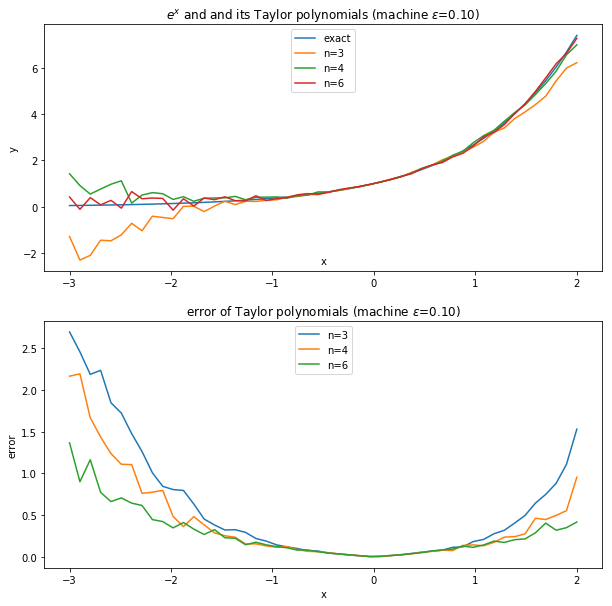

In [110]:
xlist = np.linspace(-3, 2, 50)
nlist = [3,4,6]
eps=0.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.exp(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,expserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(errxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(errxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$e^x$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()

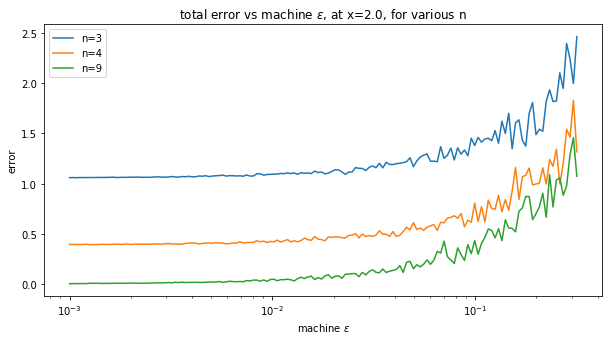

In [67]:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(errelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(errelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'total error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

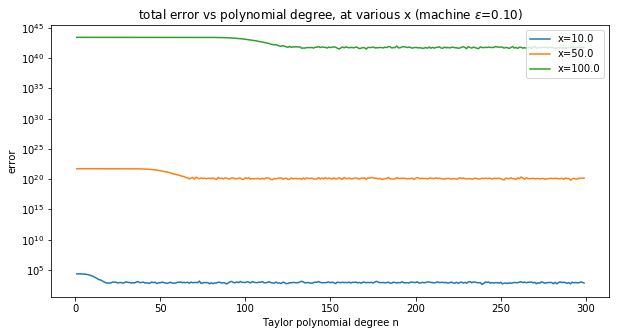

In [118]:
xlist = [10,50,100]
nlist=range(1,300)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(errnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()


For positive $x$:
The smaller the value of $|x|=x$, the lower $n$ is needed to attain the threshold where total accuracy does not improve anymore.
The threshold does NOT seem to depend on $\epsilon$.

For negative $x$:
If $|x|$ is small, we have a situation similar to the positive case i.e. a smaller $|x|$ leads to a lower threshold. 
For higher values of $|x|$, we see an increase in the total error, and then eventually a leveling off, at an error higher than the lowest error. This levelling off/threshold where the error stabilizes happens at higher $n$ for larger $|x|$. Again here, our thesholds do NOT seem to depend on $\epsilon$.

Now, we modify the code to study the relative error instead of the absolute error:

In [51]:
def relerrxlist(n,xlist,eps):
#difference between Tn(x) and e^x all divided by e^x
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append((expser(n,x,eps)-np.exp(x))/(np.exp(x)))
    return yy

In [68]:
def relerrelist(n,x,elist):
#difference between Tn(x) and e^x all divided by e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append((expser(n,x,eps)-np.exp(x))/(np.exp(x)))
    return yy

In [53]:
def relerrnlist(nlist,x,eps):
#difference between Tn(x) and e^x all divided by e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append((expser(n,x,eps)-np.exp(x))/(np.exp(x)))
    return yy

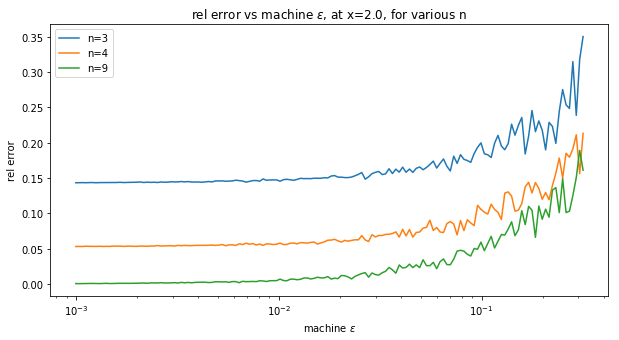

In [66]:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(relerrelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(relerrelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'rel error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('rel error')
plt.legend()
plt.show()

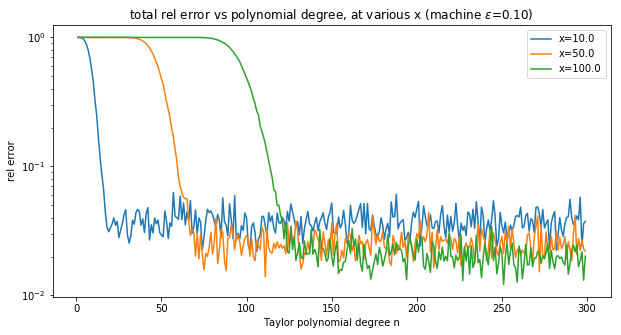

In [70]:
xlist = [10,50,100]
nlist=range(1,300)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(relerrnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(relerrnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total rel error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('rel error')
plt.legend()
plt.show()

After modifying the code to study the relative error instead of the absolute error, we see that the behaviour is very similar to the absolute error behaviour. One noticeable difference here is that there appears to be much more "noise" after hitting thresholds in the sense that the relative error fluctuates heavily about the leveled value.

# Sine

Now, we study the effect of inexact arithmetic on computation of the $sin(x)$ series

$$
sin(x) = x  -\frac{x^3}{3!} +\frac{x^5}{5!} -\ldots .
$$

which is approximated by the Taylor polynomial

$$
T_n(x) = x  -\frac{x^3}{3!} + \ldots + \frac{(-1)^nx^{2n+1}}{(2n+1)!} .
$$


In [123]:
def myexpser(n,x,eps=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for sin(x)
# n - degree of the Taylor polynomial
# x - the argument
# eps - relative error in computation of the series terms, modeled by uniform noise
    b=float(x)
    y=b
    for i in range(1,n+1):
        b*=((-1)**i)*float(x**2)/(2*i*(2*i+1))
        r=2*eps*rn.random()-eps
        y+=b*(1.+r)
    return y

In [111]:
def myexpserlist(n,xlist,eps=0):
#works with *list* of x
    ylist = []
    for x in xlist:
        ylist.append(myexpser(n,x,eps))
    return ylist

In [129]:
def myerrxlist(n,xlist,eps):
#difference between Tn(x) and sinx
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(myexpser(n,x,eps)-np.sin(x))
    return yy

In [130]:
def myerrelist(n,x,elist):
#difference between Tn(x) and sinx
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(myexpser(n,x,eps)-np.sin(x))
    return yy

In [131]:
def myerrnlist(nlist,x,eps):
#difference between Tn(x) and sinx
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(myexpser(n,x,eps)-np.sin(x))
    return yy

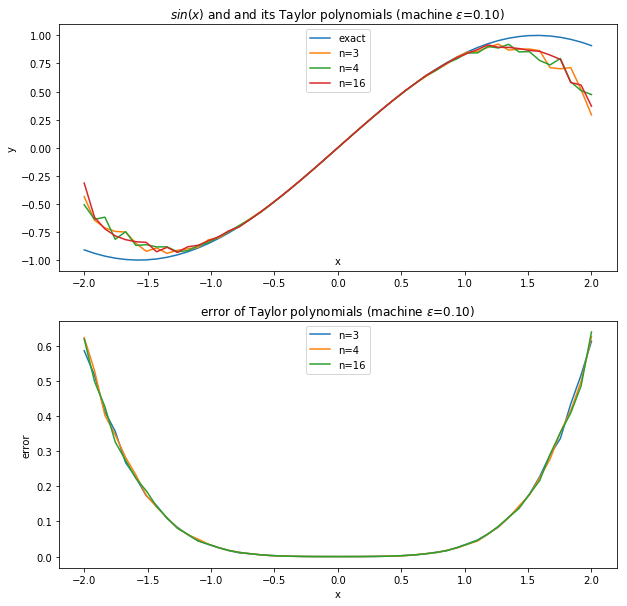

In [134]:
xlist = np.linspace(-2, 2, 50)
nlist = [3,4,16]
eps=0.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.sin(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,myexpserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(myerrxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(myerrxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$sin(x)$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()

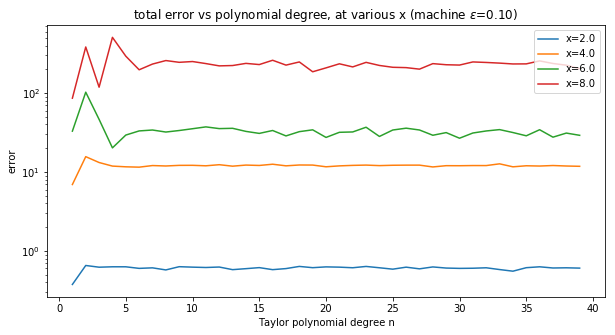

In [170]:
xlist = [2,4,6,8]
nlist=range(1,40)
eps=0.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(myerrnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(myerrnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

For $x \in [-1,1]$ the approximation is quite accurate and the degree of the Taylor polynomial doesnt have a noticeable effect on the error. So in this case, there isnt a well defined threshold at which the total accuracy does not improve anymore. This speaks to the power of this approximation in $[-1,1]$ and why argument reduction is very important and needed. In this range, $\epsilon$ doesnt affect the error plot much; increasing just minimally changes the "noise" about the straight line of a fixed error and shifts the lines vertically to higher errors.

For $|x|>>1$ we start to have large errors. The errors are symmettric for $x<<1$ and $x>>1$. So WLOG consider $x>>1$.  We see an increase in the total error, and then eventually a leveling off, at an error higher than the lowest error. This levelling off/threshold where the error stabilizes happens at higher  $n$  for larger $x$ . Also,here, a smaller $\epsilon$ leads to a slightly larger $n$ for the threshold because there is more of a "bump" at the highest error.

Now, we modify the code to study the relative error instead of the absolute error:

In [154]:
def myrelerrxlist(n,xlist,eps):
#difference between Tn(x) and sin(x) all divided by sin(x)
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append((myexpser(n,x,eps)-np.sin(x))/(np.sin(x)))
    return yy

In [155]:
def myrelerrelist(n,x,elist):
#difference between Tn(x) and sin(x) all divided by sin(x)
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append((myexpser(n,x,eps)-np.sin(x))/(np.sin(x)))
    return yy

In [156]:
def myrelerrnlist(nlist,x,eps):
#difference between Tn(x) and sin(x) all divided by sin(x)
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append((myexpser(n,x,eps)-np.sin(x))/(np.sin(x)))
    return yy

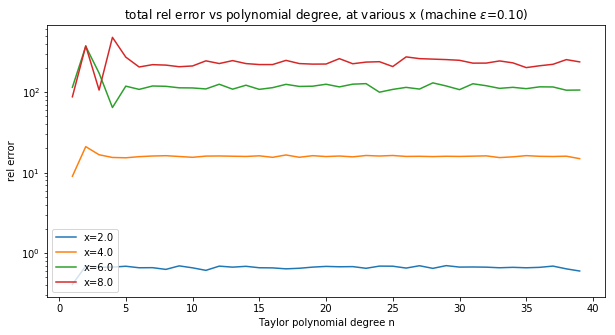

In [171]:
xlist = [2,4,6,8]
nlist=range(1,40)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(myrelerrnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(myrelerrnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total rel error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('rel error')
plt.legend()
plt.show()

After modifying the code to study the relative error instead of the absolute error, we see that the behaviour is very similar to the absolute error behaviour. 